## Limpieza de los datos

In [14]:
import pandas as pd
import seaborn as sns
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [15]:
file = '../data/raw/dataset.csv'
data = pd.read_csv(file, delimiter=';');
data

,#time,R4_Windgeschwindigkeit_B4_1Hz.Mean,R4_Windgeschwindigkeit_B4_1Hz.Stddev,R4_Windgeschwindigkeit_B4_1Hz.Min,R4_Windgeschwindigkeit_B4_1Hz.Max,R4_Windgeschwindigkeit_B4_1Hz.NVal,R4_Windgeschwindigkeit_B4_1Hz.Flag,R4_Windgeschwindigkeit_B4_1Hz.Detailed_Flag,R4_Windgeschwindigkeit_B4_1Hz.A4,R4_Windgeschwindigkeit_B4_1Hz.A3,R4_Windgeschwindigkeit_B4_1Hz.A2,R4_Windgeschwindigkeit_B4_1Hz.A1,R4_Windgeschwindigkeit_B4_1Hz.A0,R4_elektrische_Leistung_B4_50Hz.Mean,R4_elektrische_Leistung_B4_50Hz.Stddev,R4_elektrische_Leistung_B4_50Hz.Min,R4_elektrische_Leistung_B4_50Hz.Max,R4_elektrische_Leistung_B4_50Hz.NVal,R4_elektrische_Leistung_B4_50Hz.Flag,R4_elektrische_Leistung_B4_50Hz.Detailed_Flag,R4_elektrische_Leistung_B4_50Hz.A4,R4_elektrische_Leistung_B4_50Hz.A3,R4_elektrische_Leistung_B4_50Hz.A2,R4_elektrische_Leistung_B4_50Hz.A1,R4_elektrische_Leistung_B4_50Hz.A0,F1_dir(90).Mean,F1_dir(90).Stddev,F1_dir(90).Min,F1_dir(90).Max,F1_dir(90).NVal,F1_dir(90).Flag,F1_dir(90).Detailed_Flag,F1_dir(90).A4,F1_dir(90).A3,F1_dir(90).A2,F1_dir(90).A1,F1_dir(90).A0,R4_Azimutwinkel_B4_50Hz.Mean,R4_Azimutwinkel_B4_50Hz.Stddev,R4_Azimutwinkel_B4_50Hz.Min,R4_Azimutwinkel_B4_50Hz.Max,R4_Azimutwinkel_B4_50Hz.NVal,R4_Azimutwinkel_B4_50Hz.Flag,R4_Azimutwinkel_B4_50Hz.Detailed_Flag,R4_Azimutwinkel_B4_50Hz.A4,R4_Azimutwinkel_B4_50Hz.A3,R4_Azimutwinkel_B4_50Hz.A2,R4_Azimutwinkel_B4_50Hz.A1,R4_Azimutwinkel_B4_50Hz.A0
0,2017-01-01 00:00:00,nan,nan,nan,nan,"0,0",0,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,"0,0",0,0,nan,nan,nan,nan,nan,"229,658055776645","3,01985603098087","221,030966186523","239,37282409668","1,0",1,19999999999,nan,nan,nan,nan,nan,nan,nan,nan,nan,"0,0",0,0,nan,nan,nan,nan,nan
1,2017-01-01 00:00:00.005000,"13,5254","1,0684","9,77035","17,2249","600,0",0,0,"0,0","0,0","0,0","1,0","0,0","5229,55","70,4321","4922,65","5476,65","30000,0",0,0,"0,0","0,0","0,0","1,0","0,0",nan,nan,nan,nan,"0,0",0,0,nan,nan,nan,nan,nan,"116,834","2,91401","110,316","122,384","30000,0",0,0,"0,0","0,0","0,0","1,0","0,0"
2,2017-01-01 00:10:00,nan,nan,nan,nan,"0,0",0,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,"0,0",0,0,nan,nan,nan,nan,nan,"229,195124761674","3,02672659449318","216,47063293457","238,402258300781","1,0",1,19999999999,nan,nan,nan,nan,nan,nan,nan,nan,nan,"0,0",0,0,nan,nan,nan,nan,nan
3,2017-01-01 00:10:00.005000,"13,4771","1,00513","10,4668","17,6138","600,0",0,0,"0,0","0,0","0,0","1,0","0,0","5235,97","67,2917","4947,1","5457,98","30000,0",0,0,"0,0","0,0","0,0","1,0","0,0",nan,nan,nan,nan,"0,0",0,0,nan,nan,nan,nan,nan,"116,283","2,56048","110,316","123,549","30000,0",0,0,"0,0","0,0","0,0","1,0","0,0"
4,2017-01-01 00:20:00,nan,nan,nan,nan,"0,0",0,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,"0,0",0,0,nan,nan,nan,nan,nan,"228,231357075087","3,15702504969684","218,158453369141","238,367880249023","1,0",1,19999999999,nan,nan,nan,nan,nan,nan,nan,nan,nan,"0,0",0,0,nan,nan,nan,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470899,2020-12-31 23:10:00,"2,68048421662684","0,306436110110995","1,642810855","3,42661718",600,1,10000999999999,"0,0","0,0","0,0","3,5","0,0","-25,5210720353561","5,99426774412673","-91,6599459999998","-17,7746575000001",30000,1,10000999999999,"0,0","0,0","0,0","900,0","-2200,0","346,80204557311","5,85855048955957","0,115968599999974","359,7156388",1,1,1000019999999999,nan,nan,nan,nan,nan,"347,65583219694","10,0760636077068","327,460173798747","354,639773958072",30000,1,10000999999999,"0,0","0,0","0,0","36,3507851","31,32456292"
470900,2020-12-31 23:20:00,"2,32496064047232","0,301026550351038","1,64067456","3,1264677325",600,1,10000999999999,"0,0","0,0","0,0","3,5","0,0","-24,2901867894102","5,16514571024271","-145,2199135","-20,7959889999997",30000,1,10000999999999,"0,0","0,0","0,0","900,0","-2200,0","335,144025491207","5,1484680866262","320,9809246","350,523019",1,1,1000019999999999,nan,nan,nan,nan,nan

### Información y limpieza de los datos

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470904 entries, 0 to 470903
Data columns (total 49 columns):
 #   Column                                          Non-Null Count   Dtype 
---  ------                                          --------------   ----- 
 0   #time                                           470904 non-null  object
 1    R4_Windgeschwindigkeit_B4_1Hz.Mean             470904 non-null  object
 2    R4_Windgeschwindigkeit_B4_1Hz.Stddev           470904 non-null  object
 3    R4_Windgeschwindigkeit_B4_1Hz.Min              470904 non-null  object
 4    R4_Windgeschwindigkeit_B4_1Hz.Max              470904 non-null  object
 5    R4_Windgeschwindigkeit_B4_1Hz.NVal             470904 non-null  object
 6    R4_Windgeschwindigkeit_B4_1Hz.Flag             470904 non-null  int64 
 7    R4_Windgeschwindigkeit_B4_1Hz.Detailed_Flag    470904 non-null  int64 
 8    R4_Windgeschwindigkeit_B4_1Hz.A4               470904 non-null  object
 9    R4_Windgeschwindigkeit_B4_1Hz.A3    

Se mira la información que aporta cada columna y se eliminan aquellas que no dan ninguna información.

In [17]:
pd.options.display.max_columns = None
data.describe(include='all')

,#time,R4_Windgeschwindigkeit_B4_1Hz.Mean,R4_Windgeschwindigkeit_B4_1Hz.Stddev,R4_Windgeschwindigkeit_B4_1Hz.Min,R4_Windgeschwindigkeit_B4_1Hz.Max,R4_Windgeschwindigkeit_B4_1Hz.NVal,R4_Windgeschwindigkeit_B4_1Hz.Flag,R4_Windgeschwindigkeit_B4_1Hz.Detailed_Flag,R4_Windgeschwindigkeit_B4_1Hz.A4,R4_Windgeschwindigkeit_B4_1Hz.A3,R4_Windgeschwindigkeit_B4_1Hz.A2,R4_Windgeschwindigkeit_B4_1Hz.A1,R4_Windgeschwindigkeit_B4_1Hz.A0,R4_elektrische_Leistung_B4_50Hz.Mean,R4_elektrische_Leistung_B4_50Hz.Stddev,R4_elektrische_Leistung_B4_50Hz.Min,R4_elektrische_Leistung_B4_50Hz.Max,R4_elektrische_Leistung_B4_50Hz.NVal,R4_elektrische_Leistung_B4_50Hz.Flag,R4_elektrische_Leistung_B4_50Hz.Detailed_Flag,R4_elektrische_Leistung_B4_50Hz.A4,R4_elektrische_Leistung_B4_50Hz.A3,R4_elektrische_Leistung_B4_50Hz.A2,R4_elektrische_Leistung_B4_50Hz.A1,R4_elektrische_Leistung_B4_50Hz.A0,F1_dir(90).Mean,F1_dir(90).Stddev,F1_dir(90).Min,F1_dir(90).Max,F1_dir(90).NVal,F1_dir(90).Flag,F1_dir(90).Detailed_Flag,F1_dir(90).A4,F1_dir(90).A3,F1_dir(90).A2,F1_dir(90).A1,F1_dir(90).A0,R4_Azimutwinkel_B4_50Hz.Mean,R4_Azimutwinkel_B4_50Hz.Stddev,R4_Azimutwinkel_B4_50Hz.Min,R4_Azimutwinkel_B4_50Hz.Max,R4_Azimutwinkel_B4_50Hz.NVal,R4_Azimutwinkel_B4_50Hz.Flag,R4_Azimutwinkel_B4_50Hz.Detailed_Flag,R4_Azimutwinkel_B4_50Hz.A4,R4_Azimutwinkel_B4_50Hz.A3,R4_Azimutwinkel_B4_50Hz.A2,R4_Azimutwinkel_B4_50Hz.A1,R4_Azimutwinkel_B4_50Hz.A0
count,470904,470904,470904,470904,470904,470904,470904.000000,4.709040e+05,470904,470904,470904,470904,470904,470904,470904,470904,470904,470904,470904.000000,4.709040e+05,470904,470904,470904,470904,470904,470904,470904,470904,470904,470904,470904.000000,4.709040e+05,470904,470904,470904,470904,470904,470904,470904,470904,470904,470904,470904.000000,4.709040e+05,470904,470904,470904,470904,470904
unique,235684,165364,164753,19127,29506,6,NaN,NaN,2,2,2,3,2,150687,165552,35472,34047,32,NaN,NaN,2,2,2,3,3,153110,153007,132500,132795,6,NaN,NaN,2,2,2,2,2,151310,166256,24061,24074,32,NaN,NaN,2,2,2,5,6
top,2018-09-28 20:10:00,nan,nan,nan,nan,"600,0",NaN,NaN,"0,0","0,0","0,0","3,5","0,0",nan,nan,nan,nan,"30000,0",NaN,NaN,"0,0","0,0","0,0","900,0","-2200,0",nan,nan,nan,nan,"1,0",NaN,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,"30000,0",NaN,NaN,"0,0","0,0","0,0","36,3507851","31,32456292"
freq,2,115440,115440,115440,115440,191866,NaN,NaN,355464,355464,355464,286560,355464,118522,118522,118522,118522,184223,NaN,NaN,352382,352382,352382,280290,280290,149008,149012,149012,149012,121590,NaN,NaN,454886,454886,454886,454886,454886,118522,118522,118522,118522,184223,NaN,NaN,352382,352382,352382,206584,206584
mean,NaN,NaN,NaN,NaN,NaN,NaN,0.083259,2.498818e+13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.258743,4.325934e+13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.413205,5.848085e+13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.337973,4.542611e+13,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,0.276274,1.544465e+14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.437944,1.655276e+14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.492410,2.346012e+14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.473020,1.649390e+14,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000e+00,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000e+00,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000e+00,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.0000

In [18]:
data = data.drop(columns=[' R4_Windgeschwindigkeit_B4_1Hz.Flag',' R4_Windgeschwindigkeit_B4_1Hz.Detailed_Flag',' R4_Windgeschwindigkeit_B4_1Hz.A4',
                            ' R4_Windgeschwindigkeit_B4_1Hz.A3',' R4_Windgeschwindigkeit_B4_1Hz.A2',' R4_Windgeschwindigkeit_B4_1Hz.A1',' R4_Windgeschwindigkeit_B4_1Hz.A0',
                            ' R4_elektrische_Leistung_B4_50Hz.Flag',' R4_elektrische_Leistung_B4_50Hz.Detailed_Flag',' R4_elektrische_Leistung_B4_50Hz.A4',' R4_elektrische_Leistung_B4_50Hz.A3',
                            ' R4_elektrische_Leistung_B4_50Hz.A2',' R4_elektrische_Leistung_B4_50Hz.A1',' R4_elektrische_Leistung_B4_50Hz.A0',' F1_dir(90).Detailed_Flag',' F1_dir(90).Flag',
                            ' F1_dir(90).A4',' F1_dir(90).A3',' F1_dir(90).A2',' F1_dir(90).A1',' F1_dir(90).A0',' R4_Azimutwinkel_B4_50Hz.Flag',' R4_Azimutwinkel_B4_50Hz.Detailed_Flag',
                            ' R4_Azimutwinkel_B4_50Hz.A4',' R4_Azimutwinkel_B4_50Hz.A3',' R4_Azimutwinkel_B4_50Hz.A2',' R4_Azimutwinkel_B4_50Hz.A1',' R4_Azimutwinkel_B4_50Hz.A0',
                            ' R4_Windgeschwindigkeit_B4_1Hz.Stddev',' R4_Windgeschwindigkeit_B4_1Hz.Min',' R4_Windgeschwindigkeit_B4_1Hz.Max',' R4_Windgeschwindigkeit_B4_1Hz.NVal',
                            ' R4_elektrische_Leistung_B4_50Hz.Stddev',' R4_elektrische_Leistung_B4_50Hz.Min',' R4_elektrische_Leistung_B4_50Hz.Max',' R4_elektrische_Leistung_B4_50Hz.NVal',
                            ' F1_dir(90).Stddev',' F1_dir(90).Min',' F1_dir(90).Max',' F1_dir(90).NVal',' R4_Azimutwinkel_B4_50Hz.Stddev',' R4_Azimutwinkel_B4_50Hz.Min',
                            ' R4_Azimutwinkel_B4_50Hz.Max',' R4_Azimutwinkel_B4_50Hz.NVal'])

Se cambia el tipo de variable a numérica.

In [19]:
columns = data.columns[1:]
for i in columns:
       data[i] = data[i].apply(lambda x: x.replace(' ',''))
       data[i] = data[i].apply(lambda x: x.replace(',','.'))
       data[i] = data[i].astype('float64')

Se modifica el nombre de las columnas restantes por uno más entendible.

In [20]:
data.columns = ['Time','WindSpeed','ActivePower','WindDirection','YawAngle']

In [21]:
data

,Time,WindSpeed,ActivePower,WindDirection,YawAngle
0,2017-01-01 00:00:00,NaN,NaN,229.658056,NaN
1,2017-01-01 00:00:00.005000,13.525400,5229.550000,NaN,116.834000
2,2017-01-01 00:10:00,NaN,NaN,229.195125,NaN
3,2017-01-01 00:10:00.005000,13.477100,5235.970000,NaN,116.283000
4,2017-01-01 00:20:00,NaN,NaN,228.231357,NaN
...,...,...,...,...,...
470899,2020-12-31 23:10:00,2.680484,-25.521072,346.802046,347.655832
470900,2020-12-31 23:20:00,2.324961,-24.290187,335.144025,343.985084
470901,2020-12-31 23:30:00,2.068780,-23.819663,322.270213,328.523030
470902,2020-12-31 23:40:00,2.178742,-22.054977,315.473284,322.328713


### Tratamiento de valores nulos

Se observa la cantidad de valores nulos que hay y, como se está trabajando con variables numéricas, estos se sustituyen por 9999 para facilitar su tratamiento.

In [22]:
data.isnull().sum()

Time                  0
WindSpeed        115440
ActivePower      118522
WindDirection    149008
YawAngle         118522
dtype: int64

In [23]:
data = data.fillna(9999)

Para realizar una primera limpieza y como se tiene dos valores distintos por cada segundo, se imputa cada valor nulo al posterior.

In [24]:
columns = data.columns[1:]
for col in columns:
    i = 0
    while i < (len(data[col]) - 1):
        if (data[col][i] >= 9999):
            data[col][i] = data[col][i+1]
        i += 1
data

,Time,WindSpeed,ActivePower,WindDirection,YawAngle
0,2017-01-01 00:00:00,13.525400,5229.550000,229.658056,116.834000
1,2017-01-01 00:00:00.005000,13.525400,5229.550000,229.195125,116.834000
2,2017-01-01 00:10:00,13.477100,5235.970000,229.195125,116.283000
3,2017-01-01 00:10:00.005000,13.477100,5235.970000,228.231357,116.283000
4,2017-01-01 00:20:00,13.223300,5234.350000,228.231357,115.552000
...,...,...,...,...,...
470899,2020-12-31 23:10:00,2.680484,-25.521072,346.802046,347.655832
470900,2020-12-31 23:20:00,2.324961,-24.290187,335.144025,343.985084
470901,2020-12-31 23:30:00,2.068780,-23.819663,322.270213,328.523030
470902,2020-12-31 23:40:00,2.178742,-22.054977,315.473284,322.328713


### Tratamiento de la columna Time

Como se ha mencionado anteriormente, cada segundo esta duplicado. Como consecuencia, se elimina uno de ellos.

In [25]:
i = 0
indices = []
while i < (len(data['Time'])):
    if (len(data.iloc[i]['Time']) > 19):
        indices.append(i) 
    i = i+1

data.drop(indices, axis=0, inplace=True) 

### Tratamiento de outliers

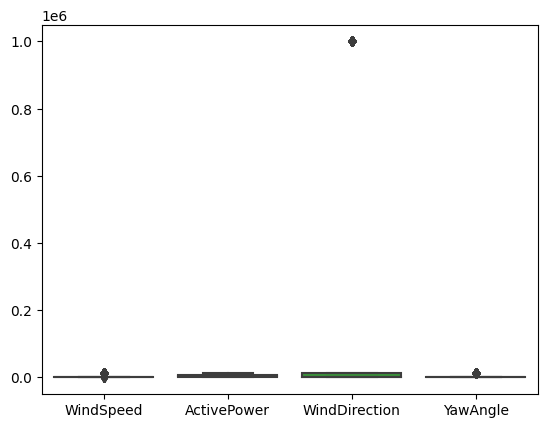

In [26]:
sns.boxplot(data=data);

##### Wind Speed

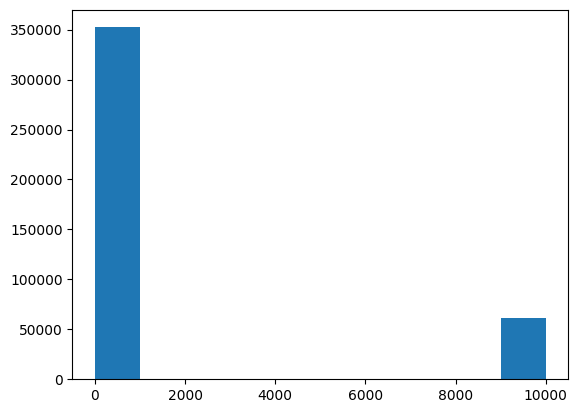

In [27]:
plt.hist(x=data['WindSpeed']);

In [28]:
# imputamos a la media
mean_ws = np.mean(data['WindSpeed'][data['WindSpeed']<1000])
data['WindSpeed'] = data['WindSpeed'].apply(lambda x: mean_ws if x>=1000 else x)

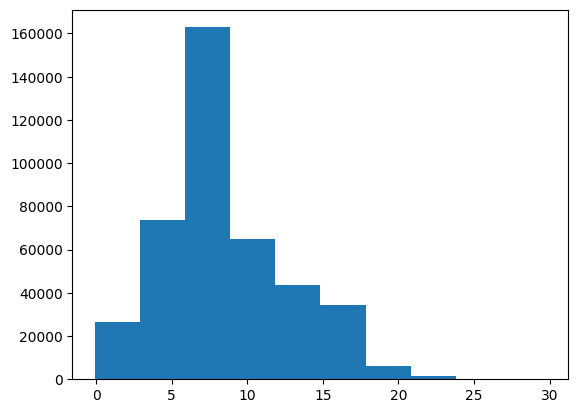

In [42]:
plt.hist(x=data['WindSpeed']);

##### Active Power

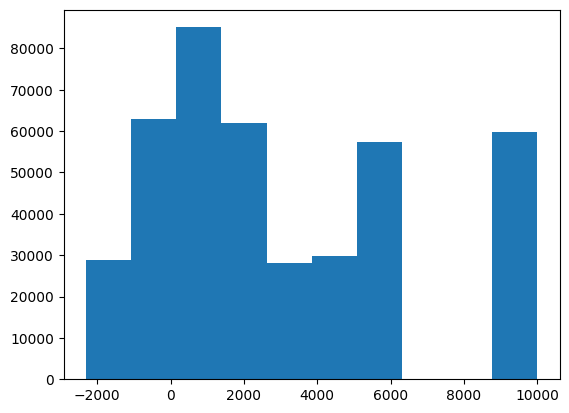

In [30]:
plt.hist(x=data['ActivePower']);

In [31]:
# imputamos a la media
mean_power = np.mean(data['ActivePower'][data['ActivePower']<7000])
data['ActivePower'] = data['ActivePower'].apply(lambda x: mean_power if x>7000 else x)

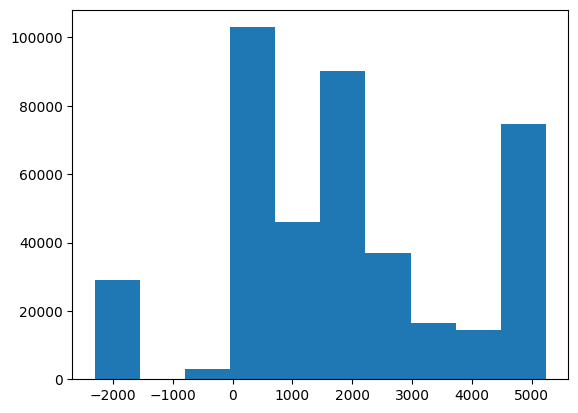

In [32]:
plt.hist(x=data['ActivePower']);

##### Wind Direction

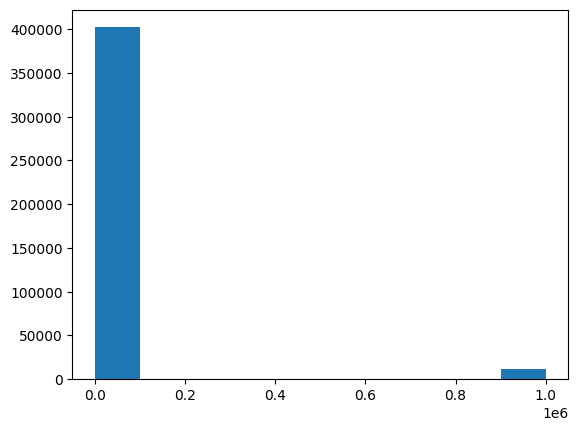

In [33]:
plt.hist(x=data['WindDirection']);

In [34]:
# imputamos a la media
mean_wd = np.mean(data['WindDirection'][data['WindDirection']<1000])
data['WindDirection'] = data['WindDirection'].apply(lambda x: mean_wd if x>1000 else x)

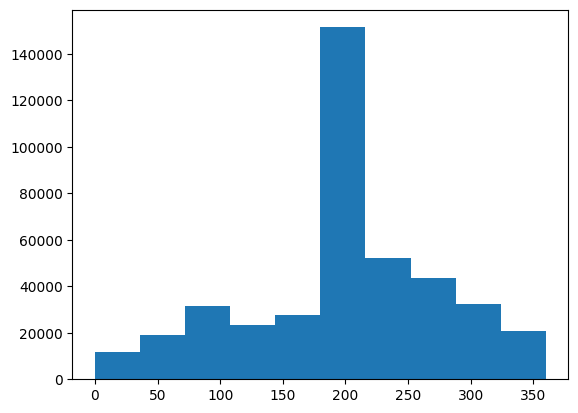

In [35]:
plt.hist(x=data['WindDirection']);

##### Yaw Angle

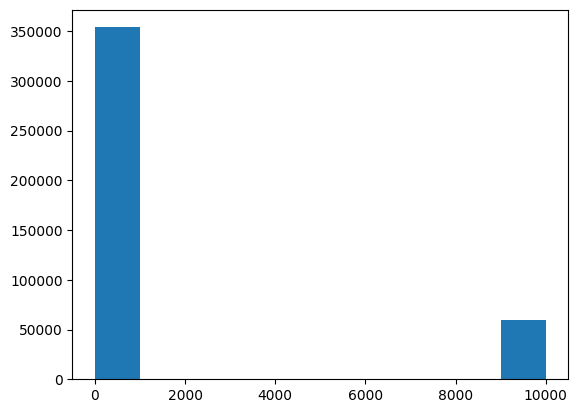

In [36]:
plt.hist(x=data['YawAngle']);

In [37]:
# imputamos a la media
mean_yaw = np.mean(data['YawAngle'][data['YawAngle']<1000])
data['YawAngle'] = data['YawAngle'].apply(lambda x: mean_yaw if x>1000 else x)

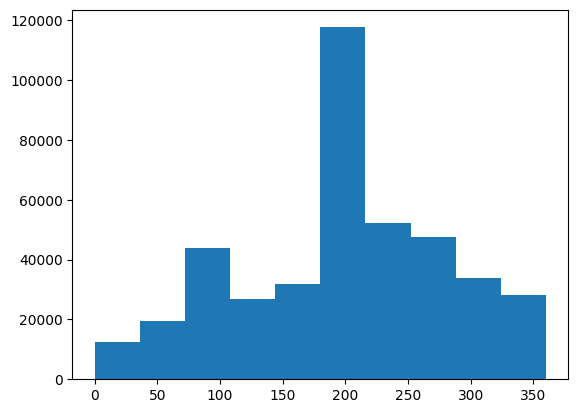

In [38]:
plt.hist(x=data['YawAngle']);

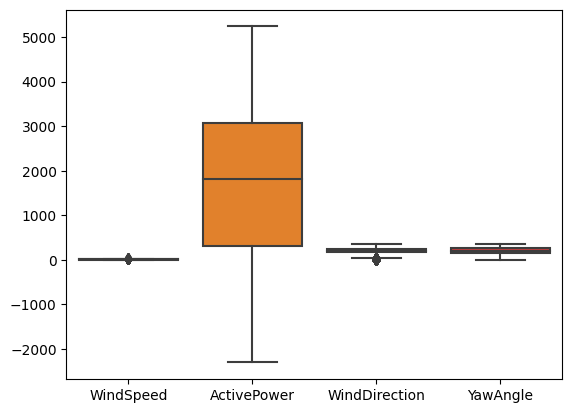

In [39]:
sns.boxplot(data=data);

In [43]:
data.to_csv('../data/processed/datos_limpios.csv', index=False)